# Understanding Law of Large Numbers and Central Limit Theorem

Rafiq Islam  
2025-03-15

Statistical inference is a fundamental part of data science and machine
learning. Two of the most important theorems in probability theory that
form the backbone of many statistical methods are the **Law of Large
Numbers (LLN)** and the **Central Limit Theorem (CLT)**. It’s not
uncommon to mix-up with these two concepts often.

## The Law of Large Numbers (LLN)

### Intuition Behind LLN

The Law of Large Numbers states that as the sample size increases, the
sample mean approaches the population mean. In other words, with more
observations, the average of the sample becomes a better estimate of the
true average of the population.

### Mathematical Definition

Let $X_1, X_2, X_3, \dots, X_n$ be a sequence of independent and
identically distributed (i.i.d.) random variables with an expected value
$\mu$. The sample mean is given by:

$$
\bar{X_n} = \frac{1}{n} \sum_{i=1}^{n} X_i
$$ According to LLN: $$
\bar{X_n} \to \mu \quad \text{as } n \to \infty
$$

This means that for a sufficiently large $n$, $\bar{X_n}$ will be very
close to $\mu$. That is

$$
\lim_{n\to \infty} \bar{X}_n = \lim_{n\to \infty} \frac{1}{n} \sum_{i=1}^{n} X_i = \mu
$$

### Visualization

Say, we have a population of 150,000 male in a country called VSA (a
hypothetical country)

In [1]:
import numpy as np

heights = np.random.randint(low=90, high=190, size=150000)
mean_height = np.mean(heights)

and the true mean/average height of men is np.float64(139.51). We want
to see how varying the sample size affect the sample mean and variances.

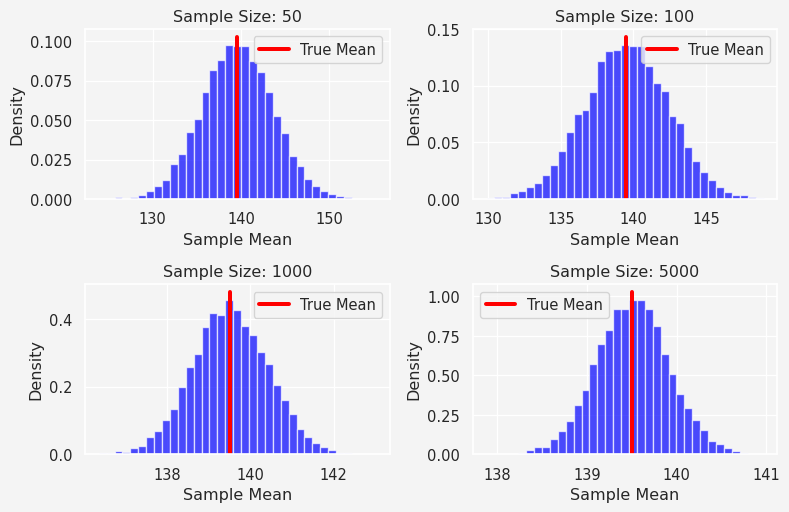

In [2]:
import matplotlib.pyplot as plt
from mywebstyle import plot_style
plot_style('#f4f4f4')

sample_sizes = [50, 100, 1000, 5000]
number_of_studies = 10000
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(8.3, 5.5))
axes = axes.ravel()

for i, n in enumerate(sample_sizes):
    sample_means = np.zeros(number_of_studies)
    for j in range(number_of_studies):
        sample = np.random.choice(heights, size=n, replace=True)
        sample_means[j] = np.mean(sample)
    
    # Plot histogram
    axes[i].hist(sample_means, bins=35, density=True, alpha=0.7, color='blue')
    ymin, ymax = axes[i].get_ylim()
    axes[i].plot([mean_height, mean_height], [ymin, ymax], color='red', linestyle='-',linewidth=3, label='True Mean')
    axes[i].set_title(f"Sample Size: {n}")
    axes[i].set_xlabel("Sample Mean")
    axes[i].set_ylabel("Density")
    axes[i].legend()

plt.tight_layout()
plt.savefig('lln.png')
plt.show()

From the top-left figure, when the sample size is 50, the sample mean
varies from 130 to 150 where the true population mean is
np.float64(139.51), similarly in the 4th figure (bottom-left), when the
sample size is 5000, the mean varies from 138 to 141. Thus, if we
increase the sample size, sufficiently large, then the sample mean is
approximately equal to the population mean. This is what LLN is!

### Types of LLN

There are two forms of the Law of Large Numbers:

1.  **Weak Law of Large Numbers (WLLN)**: Convergence of the sample mean
    to the population mean happens in probability.
2.  **Strong Law of Large Numbers (SLLN)**: Convergence happens almost
    surely, meaning with probability 1.

### Why is LLN Important?

LLN justifies the use of sample means in estimation problems. For
example, if we want to estimate the average income of a country, we
don’t need to survey the entire population; we can take a large enough
sample, and the sample mean will approximate the true mean.

------------------------------------------------------------------------

## The Central Limit Theorem (CLT)

### Intuition Behind CLT

While the Law of Large Numbers tells us that sample means converge to
the population mean, the Central Limit Theorem goes further. It states
that the distribution of the sample mean follows a normal distribution,
regardless of the shape of the population distribution, provided the
sample size is large enough.

### Mathematical Definition

Let $X_1, X_2, \dots, X_n$ be i.i.d. random variables with mean $\mu$
and variance $\sigma^2$. Define the sample mean: $$
\bar{X_n} = \frac{1}{n} \sum_{i=1}^{n} X_i
$$

Then, as $n$ increases, the distribution of $\bar{X_n}$ approaches a
normal distribution: $$
\frac{\bar{X_n} - \mu}{\sigma / \sqrt{n}} \approx N(0,1)
$$

This means that if we standardize $\bar{X_n}$, it follows a standard
normal distribution (mean 0, variance 1) when $n$ is large.

### Visualization

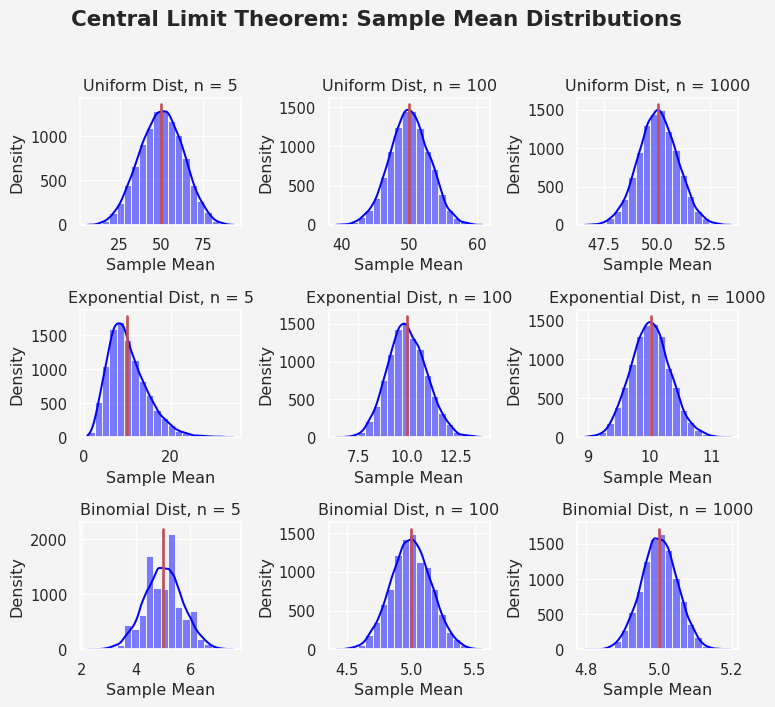

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Define population distributions
def generate_population(dist_type, size=1000000):
    if dist_type == "uniform":
        return np.random.uniform(0, 100, size)
    elif dist_type == "exponential":
        return np.random.exponential(scale=10, size=size)
    elif dist_type == "binomial":
        return np.random.binomial(n=10, p=0.5, size=size)
    else:
        raise ValueError("Unknown distribution type")

# Function to simulate sample means
def sample_means_experiment(population, sample_size, num_samples=10000):
    sample_means = np.zeros(num_samples)
    for i in range(num_samples):
        sample = np.random.choice(population, size=sample_size, replace=True)
        sample_means[i] = np.mean(sample)
    return sample_means

# Define sample sizes
sample_sizes = [5, 100, 1000]

# Define distributions to test
distributions = ["uniform", "exponential", "binomial"]

# Plot CLT effect for different distributions
fig, axes = plt.subplots(len(distributions), len(sample_sizes), figsize=(8, 7.5))
fig.suptitle("Central Limit Theorem: Sample Mean Distributions", fontsize=16, fontweight='bold')

for i, dist_type in enumerate(distributions):
    population = generate_population(dist_type)
    true_mean = np.mean(population)
    
    for j, n in enumerate(sample_sizes):
        sample_means = sample_means_experiment(population, n)

        # Plot histogram of sample means
        sns.histplot(sample_means, bins=20, kde=True, ax=axes[i, j], color='blue')
        ymin, ymax = axes[i, j].get_ylim()
        axes[i, j].plot([true_mean, true_mean], [ymin, ymax], 'r-', linewidth=2, label="True Mean")
        
        axes[i, j].set_title(f"{dist_type.capitalize()} Dist, n = {n}")
        axes[i, j].set_xlabel("Sample Mean")
        axes[i, j].set_ylabel("Density")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for title
plt.show()

### Why is CLT Important?

1.  **Allows Statistical Inference**: Even if the population
    distribution is unknown or non-normal, we can still use normal-based
    statistical techniques when working with large samples.
2.  **Enables Hypothesis Testing and Confidence Intervals**: Many
    inferential statistics methods assume normality. CLT ensures that
    these methods work for large enough samples.
3.  **Makes Sampling Practical**: Without CLT, we would need to know the
    entire population distribution to make inferences.

### Example

Suppose we have a population where the income distribution is highly
skewed. If we take small samples, their distributions may also be
skewed. However, as the sample size increases (e.g., $n > 30$), the
distribution of sample means will look more like a normal distribution,
allowing us to apply normal-based statistical methods.

------------------------------------------------------------------------

## Relationship Between LLN and CLT

While both the Law of Large Numbers and the Central Limit Theorem deal
with large samples, they serve different purposes:

-   **LLN** guarantees that the sample mean converges to the true
    population mean as the sample size increases.
-   **CLT** ensures that the distribution of the sample mean follows a
    normal distribution when the sample size is sufficiently large.

In short, LLN helps us estimate population parameters accurately, while
CLT helps us conduct statistical inference using normal approximations.

------------------------------------------------------------------------

## Conclusion

The **Law of Large Numbers** and the **Central Limit Theorem** are two
of the most fundamental theorems in probability and statistics. LLN
reassures us that as we collect more data, our sample mean becomes a
reliable estimate of the population mean. CLT, on the other hand,
enables powerful statistical techniques by ensuring that sample means
follow a normal distribution, even when the underlying population is not
normal. <br><br> Understanding these concepts is essential for data
science, as they form the basis for many machine learning and
statistical inference methods. Whether you are estimating a population
parameter, conducting hypothesis tests, or building predictive models,
LLN and CLT provide the theoretical foundation for making reliable
decisions based on data.

------------------------------------------------------------------------

### Further Reading

-   “Introduction to Probability” by Joseph K. Blitzstein and Jessica
    Hwang
-   “The Elements of Statistical Learning” by Hastie, Tibshirani, and
    Friedman
-   Any introductory statistics textbook covering probability theory

**Share on**

<a href="https://www.facebook.com/sharer.php?u=https://mrislambd.github.io/statandprob/posts/lln/" target="_blank" style="color:#1877F2; text-decoration: none;">

</a>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https://mrislambd.github.io/statandprob/posts/lln/" target="_blank" style="color:#0077B5; text-decoration: none;">

</a>

<a href="https://www.twitter.com/intent/tweet?url=https://mrislambd.github.io/statandprob/posts/lln/" target="_blank" style="color:#1DA1F2; text-decoration: none;">

</a>

**You may also like**